In [1]:
#import of library
#必要なライブラリのインポート
import os
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array
import keras.preprocessing.image as Image
from keras.models import Model
from keras.datasets import fashion_mnist
from PIL import Image
import numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import keras
import glob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import math

Using TensorFlow backend.


In [58]:
#list of variable
#変数リスト
#Division number
#分割数
cv = 10
#research gamma
#調べたいガンマ
gamma_list = np.logspace(-3, -1, 5)
#nu = 0.001のときgamma = 0.00035
#gamma_list = [0.0013,0.00131,0.00132,0.00129,0.00128]
#research nu
#調べたいnu
#nu_list = np.logspace(-3,-0.5,5)
nu = 0.000185
#nu = 0.1

#Number of test data
#実験データの数
data_range = 6000

#その他必要な変数
Tshirt_train = []
shirt_train = []


test = []

train_label = []
test_label = []

divide = data_range//cv

tmp_train = []
tmp_test = []

current_total_acc = 0

#fashion_mnistを読み込み
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

#保存してあるデータをロード
#0 T-シャツ/トップ (T-shirt/top)
#1 ズボン (Trouser)
#2 プルオーバー (Pullover)
#3 ドレス (Dress)
#4 コート (Coat)
#5 サンダル (Sandal)
#6 シャツ (Shirt)
#7 スニーカー (Sneaker)
#8 バッグ (Bag)
#9 アンクルブーツ (Ankle boot)
train = np.load("C:/Users/satok/.keras/datasets/fashion_mnist_pertype_feature/fashion_mnist_48_48_7.npy")
test = np.load("C:/Users/satok/.keras/datasets/fashion_mnist_pertype_feature/fashion_mnist_48_48_9.npy")

train = np.reshape(train, (len(train),512))
test = np.reshape(test, (len(test),512))


#train = train.astype('float32') / 255.0
#train = train.astype('float32') / 255.0

#VGG16のモデル設定
#base_model = VGG16(include_top=False, 
#                   weights='imagenet',
#                  input_shape = (48,48,3))

In [5]:
gamma_list

array([0.001     , 0.00316228, 0.01      , 0.03162278, 0.1       ])

In [37]:
#Creating test data
#学習、テストデータの作成例
#正規分布

for i in range(data_range):
    x_train.append(normal(0,0.1))
    y_train.append(normal(0,0.1))
xy_train = np.c_[x_train, y_train]

for i in range(data_range):
    x_test.append(normal(0,0.1))
    y_test.append(normal(0,0.1))
xy_test = np.c_[x_test, y_test]

NameError: name 'x_train' is not defined

In [ ]:
#Creating data_label
#データラベルの作成例
#svmは1か-1かでクラス分けするため

for i in range(data_range):
    if (math.sqrt(xy_train[i,0]**2 + xy_train[i,1]**2)) > 0.3:
        train_label.append(-1)
    else:
        train_label.append(1)
        
for j in range(data_range):
    if(math.sqrt(xy_test[j,0]**2 + xy_test[j,1]**2)) > 0.3:
        test_label.append(-1)
    else:
        test_label.append(1)

        

In [59]:
#データラベルの作成
train_label = np.array([1] * len(train))
test_label = np.array([-1] * len(test))

tmp_train_label = train_label[0:divide * (cv-1)] 
tmp_test_label = train_label[0:divide]

In [60]:
#grid_search and cross_validation
current_total_acc = 0
best_average_acc = 0

for gamma in gamma_list:
#for nu in nu_list:
        
    for i in range(cv):
        tmp_test.extend(train[i*divide: ((i+1) * divide)])
        tmp_train.extend(train[0:i*divide])
        tmp_train.extend(train[((i+1) * divide) : len(train)])
        
        clf = svm.OneClassSVM(nu = nu, kernel="rbf", gamma=gamma)
        clf.fit(tmp_train)
        pred = clf.predict(tmp_test)
        current_total_acc = current_total_acc + (len(pred[pred == tmp_test_label])/len(pred))
        
        tmp_test.clear()
        tmp_train.clear()
        
    current_average_acc = current_total_acc / cv
    
    print("gamma : " + str(gamma))
    print("average_acc : " + str(current_average_acc) + "\n")
    
    if(best_average_acc < current_average_acc):
        best_average_acc = current_average_acc
        best_gamma = gamma
    
    current_total_acc = 0
    current_average_acc = 0

print("best_gamma : " + str(best_gamma))
print("best_average_acc : " + str(best_average_acc))

gamma : 0.001
average_acc : 0.9981666666666665

gamma : 0.0031622776601683794
average_acc : 0.9979999999999999

gamma : 0.01
average_acc : 0.9976666666666667

gamma : 0.03162277660168379
average_acc : 0.9941666666666666

gamma : 0.1
average_acc : 0.9673333333333334

best_gamma : 0.001
best_average_acc : 0.9981666666666665


In [ ]:
#配列の頭から「１」を100個，「７」を20個取り出し予想
test = np.vstack((x_test_7[0:100], x_test_1[0:20]))
test1 = x_test_7[0:100]
pred = clf.predict(test)

clf = svm.OneClassSVM(nu = 0.2, kernel="rbf", gamma=0.001)
clf.fit(x_train_1)

In [72]:
svm_test_0 = np.load("C:/Users/satok/.keras/datasets/fashion_mnist_pertype_feature_test/fashion_mnist_48_48_test_7.npy")
snm_test_6 = np.load("C:/Users/satok/.keras/datasets/fashion_mnist_pertype_feature_test/fashion_mnist_48_48_test_9.npy")

In [70]:
#svm_train = np.vstack(svm_test_0[0:600],test[0:600])
svm_test_0 = np.reshape(svm_test_0, (len(svm_test_0),512))
svm_test_6 = np.reshape(svm_test_0, (len(svm_test_6),512))
svm_test = np.vstack((svm_test_0[0:1000],svm_test_6[0:100]))
svm_test.shape

(1100, 512)

In [33]:
svm_test_0.shape

(1000, 512)

In [71]:
svm_model = svm.OneClassSVM(nu = 0.000185, kernel="rbf",gamma=0.0013)
#svm_model = svm.OneClassSVM(nu = 0.1, kernel="rbf",gamma=0.01)
svm_model.fit(train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0013, kernel='rbf',
      max_iter=-1, nu=0.000185, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [78]:
pred = svm_model.predict(svm_test)
answer = np.array([1] * 1000 + [-1] * 100)
acc =  len(pred[pred == answer])/1100.0
print("accuracy : " + str(acc))
print([i for i,j in enumerate(pred) if j == -1])

accuracy : 0.9090909090909091
[]


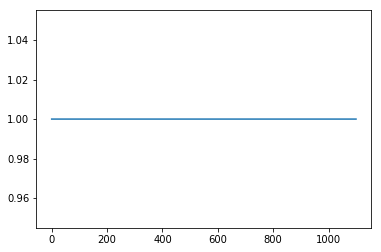

In [79]:
#予想された値をグラフ化し表示・保存
x = np.arange(0, 1100, 1)
plt.plot(x, pred)
#plt.savefig('SVMmnist.png')
plt.show()

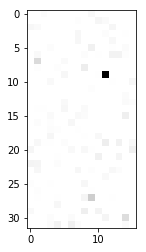

In [74]:
plt.imshow(svm_test_6[108].reshape(32,16),cmap='Greys')
plt.show()